In [6]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)


In [7]:
n_runs = 8
conditions = {
    0: 'scene_Kolkhorst',
    1: 'scene_fastERP',
    2: 'scene_cVEP',
    3: 'screen_fastERP',
    4: 'screen_cVEP'
}
n_reps = 2
n_trials = n_reps * len(conditions)
save_dir = './config'


/var/folders/1z/rtlypz2x1ys6xfdptrxz8hnm0000gn/T/ipykernel_24798/1464016194.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.heatmap(df_trial_orders.replace({v: k for k, v in conditions.items()}), annot=df_trial_orders, fmt='s', annot_kws={"rotation": 25, 'size': 7})


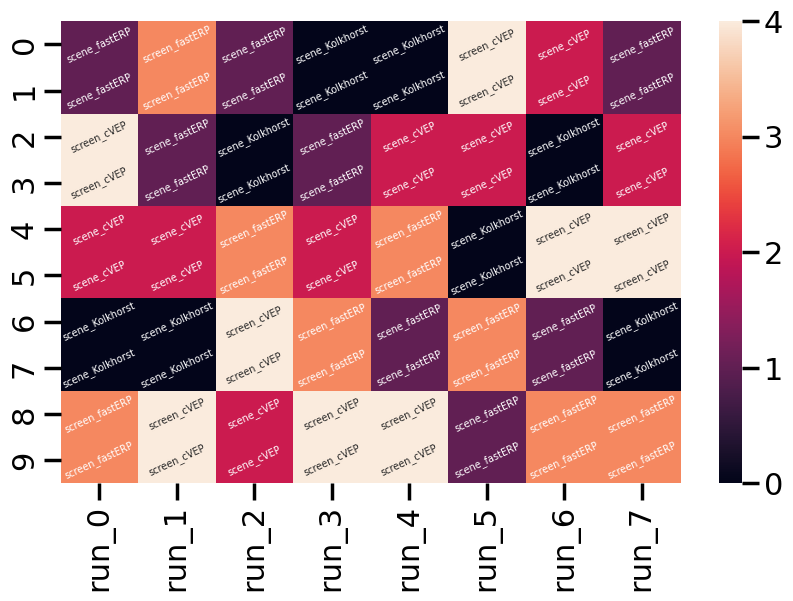

In [8]:
used_orders = []
trial_orders = dict()
for run_id in range(n_runs):
    new_keys = np.random.permutation(list(conditions.keys())).tolist()
    if new_keys in used_orders:
        continue
    used_orders.append(new_keys)
    trial_orders[f'run_{run_id}'] = np.ravel([[conditions[i]] * n_reps for i in new_keys])

df_trial_orders = pd.DataFrame(trial_orders)
df_trial_orders.to_csv(f"{save_dir}/trial_orders.csv", index=False)

# Use heatmap to visualize trial orders. Use the string values as annotations instead of indices
plt.figure(figsize=(10, 6))
sns.heatmap(df_trial_orders.replace({v: k for k, v in conditions.items()}), annot=df_trial_orders, fmt='s', annot_kws={"rotation": 25, 'size': 7})
plt.savefig(f"{save_dir}/trial_orders_heatmap.png")
plt.show()